In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Activation
import pandas as pd
from pathlib import Path


base_path = Path("../")
data_dir_path = base_path.joinpath("data/NCEI-Oakland_International_airport-standard_units")
data_file_path = data_dir_path.joinpath("prepared_weather.csv")
weather_file = pd.read_csv(data_file_path, index_col="DATE")

# Przygotowanie danych do modelu
lookback = 30
forecast_horizon = 7
epochs = 50
batch_size=16
validation_split=0.1

# Przygotowanie danych
def prepare_data(data, lookback=30, forecast_horizon=7):
    X, y = [], []

    for i in range(len(data) - lookback - forecast_horizon + 1):
        inputs = data.iloc[i:(i + lookback)][["PRECIPITATION", "TMAX", "TMIN"]].values
        output = data.iloc[(i + lookback):(i + lookback + forecast_horizon)][["PRECIPITATION", "TMAX", "TMIN"]].values
        X.append(inputs)
        y.append(output)

    return np.array(X), np.array(y)

X, y = prepare_data(weather_file, lookback, forecast_horizon)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowa modelu
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=forecast_horizon * X_train.shape[2]))  # Output layer
model.add(Activation('linear'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
history = model.fit(X_train, y_train.reshape(-1, forecast_horizon * X_train.shape[2]), epochs=epochs, batch_size=batch_size, validation_split=validation_split)

# Ewaluacja modelu na danych testowych
loss = model.evaluate(X_test, y_test.reshape(-1, forecast_horizon * X_test.shape[2]))
print(f"Mean Squared Error on Test Data: {loss}")

# Predykcje na danych testowych
predictions = model.predict(X_test)

# Zapisanie modelu do pliku
model.save("2Layers_Linear.h5")

2023-12-30 19:42:30.176729: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 19:42:30.220530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 19:42:30.220561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 19:42:30.221768: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 19:42:30.228037: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 19:42:30.228821: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/50
390/390 [==============================] - 1s 1ms/step - loss: 45.8815 - val_loss: 23.6731
Epoch 2/50
390/390 [==============================] - 0s 1ms/step - loss: 22.3016 - val_loss: 18.9074
Epoch 3/50
390/390 [==============================] - 0s 1ms/step - loss: 18.8751 - val_loss: 16.7641
Epoch 4/50
390/390 [==============================] - 0s 1ms/step - loss: 17.1585 - val_loss: 15.4865
Epoch 5/50
390/390 [==============================] - 0s 1ms/step - loss: 16.1963 - val_loss: 14.9937
Epoch 6/50
390/390 [==============================] - 0s 1ms/step - loss: 15.5568 - val_loss: 14.3983
Epoch 7/50
390/390 [==============================] - 0s 1ms/step - loss: 15.1223 - val_loss: 14.0329
Epoch 8/50
390/390 [==============================] - 0s 1ms/step - loss: 14.7563 - val_loss: 13.7601
Epoch 9/50
390/390 [==============================] - 0s 1ms/step - loss: 14.4786 - val_loss: 13.5542
Epoch 10/50
390/390 [==============================] - 0s 1ms/step - loss: 14.2792

/home/dawid/Projects/weather_forecast_with_ml/src/venv_msi/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


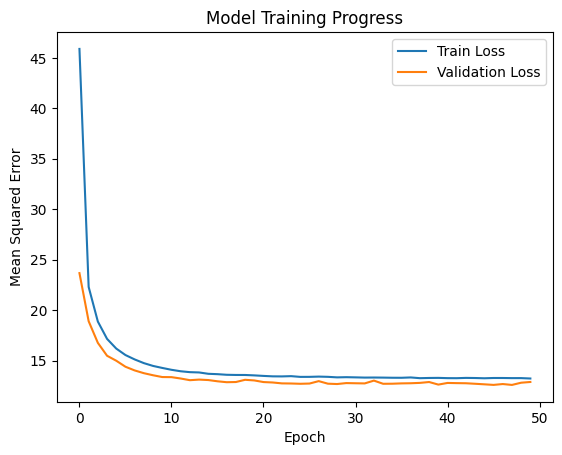

In [2]:
import matplotlib.pyplot as plt

# Rysowanie wykresu funkcji straty
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import load_model

Model = load_model("2Layers_Linear.h5")
Input = X_test[0:1, :, :]
# print(Input)

Output = Model.predict(Input)
Output = Output.reshape(7, 3)
print(Output)

1/1 [==============================] - 0s 41ms/step
[[ 1.5532302 18.418364   9.274538 ]
 [ 1.0414536 20.201082   9.649919 ]
 [ 1.6565466 21.251717  10.325058 ]
 [ 2.856245  21.01208   11.363842 ]
 [ 2.2001646 21.524332  11.163185 ]
 [ 3.8309243 21.85057   11.358846 ]
 [ 1.2446482 21.598347  10.487555 ]]
